In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "epc100"
print(variable)
model = "ACCESS-ESM1-5"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)

epc100
ACCESS-ESM1-5
ssp585
Omon


In [5]:
nc = Dataset("Data/Raw/epc100_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
unit

'mol m-2 s-1'

## Interpolation


In [8]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

epc100_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_201501-210012.nc
epc100_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_210101-230012.nc


epc100_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc


In [9]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/epc100_Omon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (360x300) to lonlat (360x180) grid, with source mask (64146)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1032 timesteps.
cdo    remapdis: Processed 111456000 values from 1 variable over 1032 timesteps [14.40s 231MB].


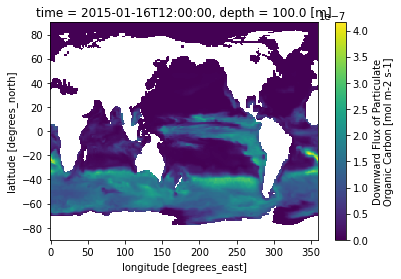

In [10]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [11]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/epc100_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (360x300) to lonlat (360x180) grid, with source mask (64146)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1980 timesteps.
cdo    remapdis: Processed 213840000 values from 1 variable over 1980 timesteps [25.86s 240MB].


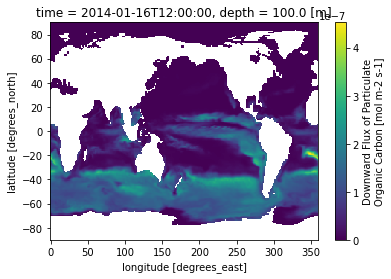

In [12]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## 20 year below -40S 

#### historical

In [13]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
historical = historical.sel(lat = slice(-90, -40))

In [14]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
#historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:     (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time        (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:0...
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -42.5 -41.5 -40.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    depth_bnds  (bnds) float64 ...
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:11:17 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/47e4bd79-c1df-4c78-978b-0f023756bf0d
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 50, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -42.5 -41.5 -40.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (lat, lon) float32 nan nan nan ... 5.265e-08 5.296e-08 5.179e-08

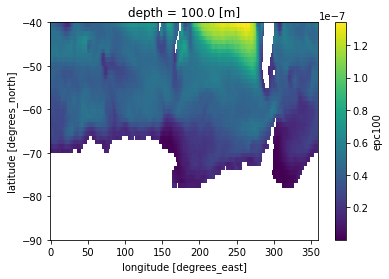

In [16]:
historical_mean[variable].plot()

In [79]:
#historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [80]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [84]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 9.194e-08 8.96e-08

In [85]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [86]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [87]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### ssp585

In [17]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
new = new.sel(lat = slice(-90, -40))

In [18]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
#new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:     (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time        (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:0...
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -42.5 -41.5 -40.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] ...
    depth_bnds  (bnds) float64 ...
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [19]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 50, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -42.5 -41.5 -40.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (lat, lon) float32 nan nan nan ... 6.073e-08 6.041e-08 5.939e-08

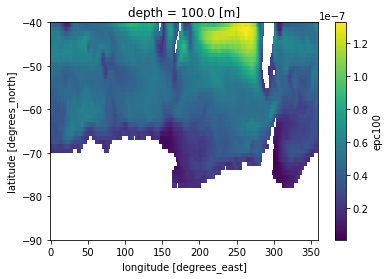

In [20]:
new_mean[variable].plot()

In [92]:
#new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [93]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [94]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 1.166e-07 1.139e-07

In [95]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [96]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 4.937e-08 5.008e-08

In [97]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 4.962e-08 4.984e-08 5.013e-08

In [98]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [100]:
# Calculate percentage difference
#historical = xarray.open_dataset("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))
#new = xarray.open_dataset("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 50, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -42.5 -41.5 -40.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    epc100      (lat, lon) float32 nan nan nan ... 8.08e-09 7.456e-09 7.604e-09

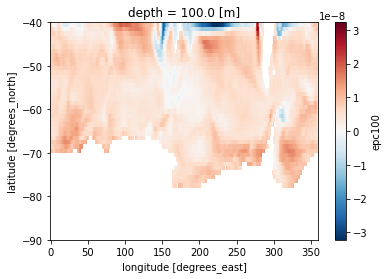

In [21]:
difference = new_mean - historical_mean
difference[variable].plot()
difference

In [22]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

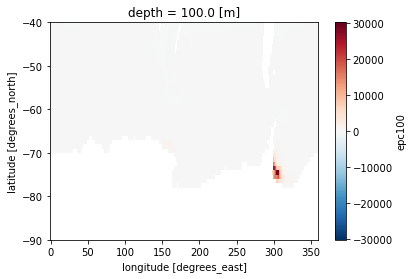

In [23]:
percentage = (difference/historical_mean)*100
percentage[variable].plot()

In [24]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [105]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 3.113e-08 2.818e-08 2.559e-08

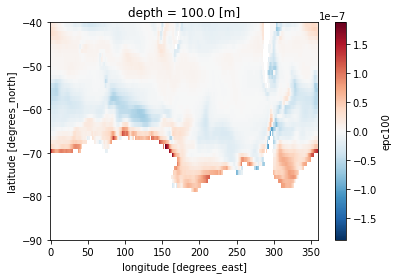

In [106]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [107]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

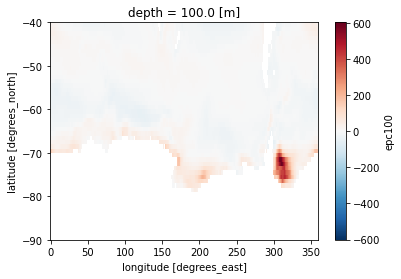

In [108]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [109]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [110]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... -1.153e-09 -9.402e-10 -6.159e-10

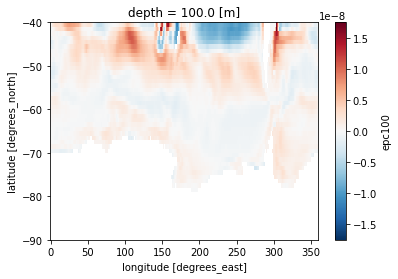

In [111]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [112]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

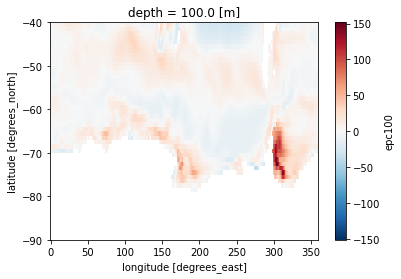

In [113]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [114]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

## Sea ice selection

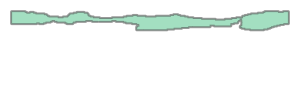

In [6]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [7]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [27]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:     (time: 1032, lon: 360, lat: 180, bnds: 2)
Coordinates:
  * time        (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:0...
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [28]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth        float64 100.0
    spatial_ref  int64 0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 95.0 105.0
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [29]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

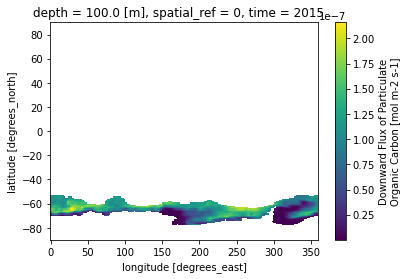

In [30]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [31]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [8]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:     (time: 1980, lon: 360, lat: 180, bnds: 2)
Coordinates:
  * time        (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:0...
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:11:17 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/47e4bd79-c1df-4c78-978b-0f023756bf0d
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [9]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1980, lon: 360, lat: 180, bnds: 2)
Coordinates:
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth        float64 100.0
    spatial_ref  int64 0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 95.0 105.0
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:11:17 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/47e4bd79-c1df-4c78-978b-0f023756bf0d
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [10]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

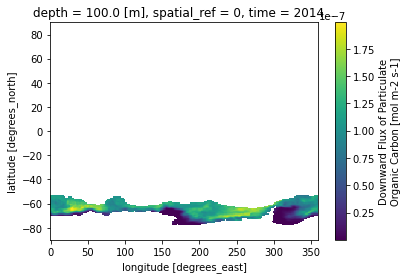

In [11]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [12]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [13]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360, time: 1980)
Coordinates:
    depth        float64 ...
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: bnds
Data variables:
    spatial_ref  int64 ...
    depth_bnds   (bnds) float64 ...
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:11:17 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/47e4bd79-c1df-4c78-978b-0f023756bf0d
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [14]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360, time: 240)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time        (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:0...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:11:17 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/47e4bd79-c1df-4c78-978b-0f023756bf0d
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

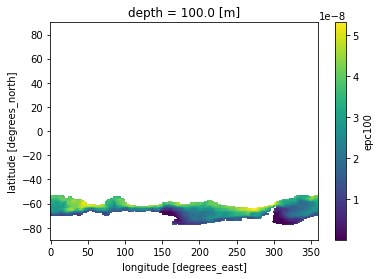

In [16]:
historical_mean[variable].plot()

In [17]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [18]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [19]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:     (time: 20, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time        (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (time, bnds) float64 95.0 105.0 95.0 105.0 ... 105.0 95.0 105.0
    epc100      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [20]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [21]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [22]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [23]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360, time: 1032)
Coordinates:
    depth        float64 ...
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Dimensions without coordinates: bnds
Data variables:
    spatial_ref  int64 ...
    depth_bnds   (bnds) float64 ...
    epc100       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [24]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360, time: 240)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time        (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:0...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [25]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

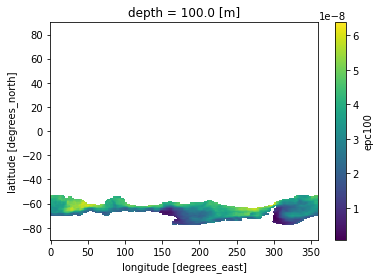

In [26]:
new_mean[variable].plot()

In [27]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [28]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [29]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:     (time: 20, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time        (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (time, bnds) float64 95.0 105.0 95.0 105.0 ... 105.0 95.0 105.0
    epc100      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [30]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [31]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:     (time: 20, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time        (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (time, bnds) float64 95.0 105.0 95.0 105.0 ... 105.0 95.0 105.0
    epc100      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [32]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [33]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [34]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, bnds: 2)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

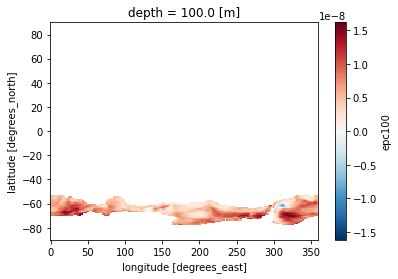

In [35]:
difference = new - historical
difference[variable].plot()
difference

In [36]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

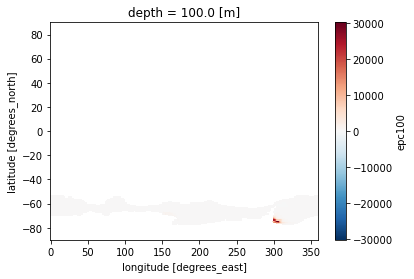

In [37]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [38]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Total export difference

In [39]:
area = nct.open_data("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/{}_{}_{}_absolute_area.nc".format(variable, model, experiment), overwrite=True)

In [40]:
area = xarray.open_dataset("Data/{}_{}_{}_absolute_area.nc".format(variable, model, experiment))
area

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    epc100      (lat, lon) float32 ...
    cell_area   (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 09 11:17:13 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [41]:
area = area.assign(export=lambda x: x.epc100 * x.cell_area)
area

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area   (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    export      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 09 11:17:13 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [42]:
area = area.drop_vars("epc100")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    export      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 09 11:17:13 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [43]:
# Total export 
spatial_mean = nc.sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:     (bnds: 2)
Coordinates:
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    export      float64 1.47e+05

In [44]:
total_inc = spatial_mean["export"].values
total_inc

array(147010.0614039)

##### historical

In [45]:
area = nct.open_data("Data/{}_{}_historical_20yr.nc".format(variable, model))
area.cell_area()
area.to_nc("Data/{}_{}_historical_20yr_area.nc".format(variable, model), overwrite=True)

In [46]:
area = xarray.open_dataset("Data/{}_{}_historical_20yr_area.nc".format(variable, model))
area

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    epc100      (lat, lon) float32 ...
    cell_area   (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 09 11:17:23 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [47]:
area = area.assign(export=lambda x: x.epc100 * x.cell_area)
area

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area   (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    export      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 09 11:17:23 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [48]:
area = area.drop_vars("epc100")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    export      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 09 11:17:23 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [49]:
# Total export 
spatial_mean = nc.sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:     (bnds: 2)
Coordinates:
    depth       float64 100.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 95.0 105.0
    export      float64 6.724e+05

In [50]:
historical_inc = spatial_mean["export"].values
historical_inc

array(672419.9788487)

In [51]:
percentage_inc = (total_inc/historical_inc)*100
percentage_inc

21.862833649828467

#### Summer

In [52]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, bnds: 2)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

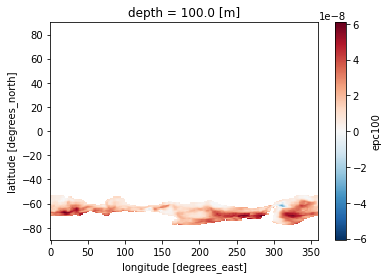

In [53]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [54]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

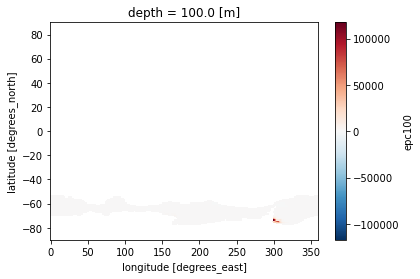

In [55]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [56]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [57]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, bnds: 2)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 0.0 0.0
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

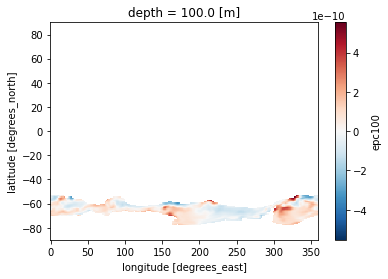

In [58]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [59]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

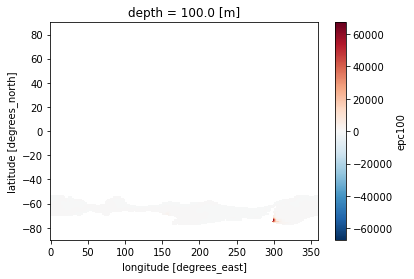

In [60]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [61]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [62]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 188.23391723632812% 6.262841800719343e-09
Median change = 24.96253776550293% 5.97531624180192e-09
Max inc = 30230.994140625% 1.6170714545182818e-08
Max dec = -32.81169128417969% -1.0452428256257917e-08


In [64]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [65]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nTotal change in export: {} mol s-1 ({}%)".format(total_inc, percentage_inc))
summary.close()

#### Season

In [66]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [67]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [68]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [69]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Export region calculation

In [70]:
percentage = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

#### Increasing

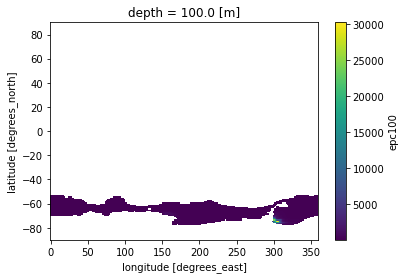

In [71]:
new = percentage.where(percentage > 0)
new[variable].plot()

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 nan nan
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    inc         (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

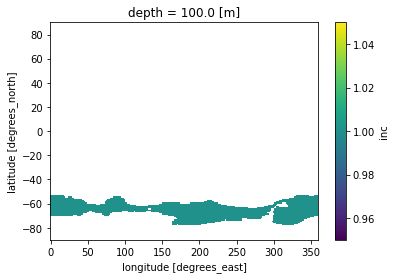

In [72]:
new1  = new.assign(inc = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new1['inc'].plot()
new1

In [73]:
new1 = new1.drop_vars(variable)
new1.to_netcdf(path = "Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Decreasing

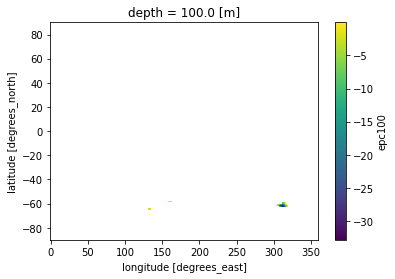

In [74]:
new2 = percentage.where(percentage < 0)
new2[variable].plot()

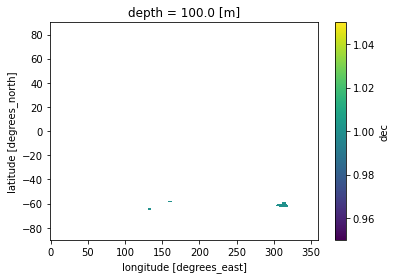

In [75]:
new3  = new2.assign(dec = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new3['dec'].plot()

In [76]:
new3

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth       float64 100.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 nan nan
    epc100      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    dec         (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [77]:
new3 = new3.drop_vars(variable)
new3.to_netcdf(path = "Data/Shape/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summary values

In [78]:
inc_area = (new1.count()["inc"].values/percentage.count()[variable].values)*100
dec_area = (new3.count()["dec"].values/percentage.count()[variable].values)*100

# mean = (percentage.mean())[variable].values
# max_value = (percentage.max())[variable].values
# min_value = (percentage.min())[variable].values

# mean_abs = (difference.mean())[variable].values
# max_value_abs = (difference.max())[variable].values
# min_value_abs = (difference.min())[variable].values

# print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n Inc area = {}\n Dec area = {}".format(mean, mean_abs, 
#                                                                                                           max_value, max_value_abs,
#                                                                                                           min_value, min_value_abs,
#                                                                                                           inc_area, dec_area))

In [79]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nInc area = {}%\nDec area = {}%".format(inc_area, dec_area))
summary.close()

### Make mask


In [6]:
shape = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
shape

,DN,geometry
0,1,"POLYGON ((-0.500 -53.000, 17.500 -53.000, 17.5..."


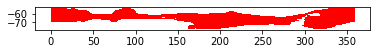

In [7]:
polygons1 = []

for i, row in shape.iterrows():
    poly = shape['geometry'][i]
    polygons1.append(poly)
    
boundary_inc = gpd.GeoSeries(ops.unary_union(polygons1))
boundary_inc.plot(color = 'red')
plt.show()

In [8]:
boundary_inc.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc.shp".format(model))

In [9]:
boundary_inc.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

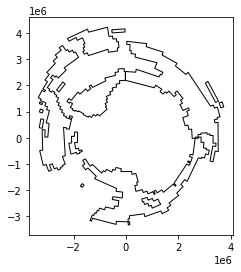

In [10]:
crs = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = boundary_inc.to_crs("epsg:3031")

# Here's what the plot looks like in GeoPandas
df_ae.plot(facecolor="none", edgecolor="black")

In [11]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc_remapped.shp".format(model))

In [9]:
shape1 = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")
shape1

,DN,geometry
0,1,"POLYGON ((157.500 -58.000, 163.500 -58.000, 16..."
1,1,"POLYGON ((310.500 -59.000, 316.500 -59.000, 31..."
2,1,"POLYGON ((131.500 -64.000, 134.500 -64.000, 13..."
3,1,"POLYGON ((146.500 -65.000, 147.500 -65.000, 14..."


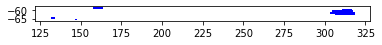

In [10]:
polygons2 = []

for i, row in shape1.iterrows():
    poly = shape1['geometry'][i]
    polygons2.append(poly)
    
boundary_dec = gpd.GeoSeries(ops.unary_union(polygons2))
boundary_dec.plot(color = 'blue')
plt.show()

In [11]:
boundary_dec.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec.shp".format(model))

In [15]:
boundary_dec.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

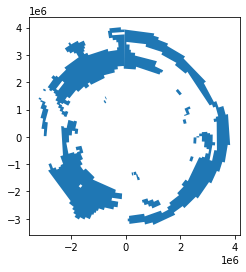

In [16]:
crs = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = boundary_dec.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

In [17]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec_remapped.shp".format(model))

#### Plot of masks

In [12]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

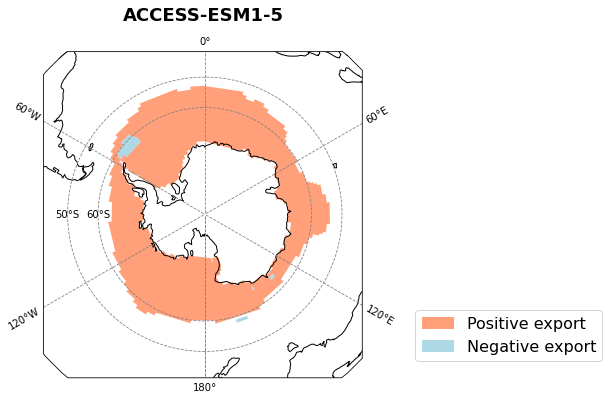

In [13]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(1,1,1,
                     projection = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.title("{}".format(model),
         fontsize = 18, fontweight="bold",
          pad = 16, loc = "center")

ax.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())


gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--',
                  y_inline = True) 

gl.ylabel_style = {'size': 10}
gl.xlabel_style = {'size': 10}

gl.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])
            
            
ax.add_geometries(inc['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightsalmon', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.add_geometries(dec['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightblue', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.coastlines() 

# ### Drawing a border box around the plot
# autoAxis = ax.axis()
# #print(autoAxis[0])
# # plt.Rectangle((left corner x value, left corner y value), extension in in the x axis direction, extension in the y axis direction)
# rec = plt.Rectangle((autoAxis[0]-1000000,autoAxis[2]-1000000),(autoAxis[1]-autoAxis[0])+2000000,(autoAxis[3]-autoAxis[2])+2000000,fill=False,lw=1)
# rec = ax.add_patch(rec)
# rec.set_clip_on(False)


inc_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightsalmon")
dec_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightblue")
labels = ['Positive export',
          'Negative export']

# bbox_to_anchor = (x position/distance from left edge, y position/distance from base)
fig.legend([inc_label, dec_label], labels,
            bbox_to_anchor=(1.22, 0.3),
           fancybox=True, prop={'size': 16})


# bbox_inches = "tight" will make sure the legend box are not cropped out when saving the image 
plt.savefig("output/{}/{}_mask_regions.png".format(model, model), bbox_inches='tight')

plt.show()

## Zonal separation

In [14]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [28]:
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360, time: 1032)
Coordinates:
    depth        float64 ...
    spatial_ref  int64 0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 ...
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

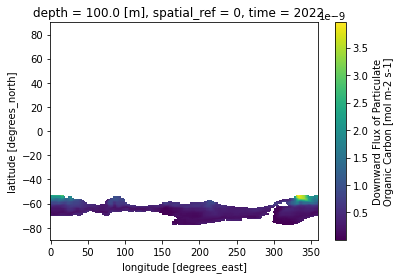

In [29]:
plotting = inc_area.sel(time = "2022-07")
plotting[variable].plot()

In [30]:
vars_list = list(inc_area.data_vars)  
# for var in vars_list:  
#     del inc_area[var].attrs['grid_mapping']


inc_area.to_netcdf(path = "Data/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

ValueError: failed to prevent overwriting existing key grid_mapping in attrs. This is probably an encoding field used by xarray to describe how a variable is serialized. To proceed, remove this key from the variable's attributes manually.

##### Decreasing

In [24]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360, time: 1032)
Coordinates:
    depth        float64 ...
    spatial_ref  int64 0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 ...
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

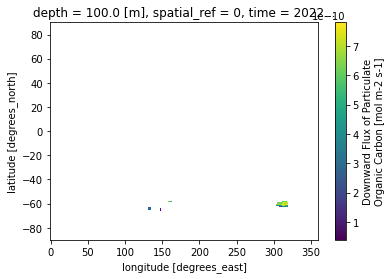

In [25]:
plotting = dec_area.sel(time = "2022-07")
plotting[variable].plot()

In [27]:
vars_list = list(dec_area.data_vars)  
# for var in vars_list:  
#     del dec_area[var].attrs['grid_mapping']


dec_area.to_netcdf(path = "Data/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

ValueError: failed to prevent overwriting existing key grid_mapping in attrs. This is probably an encoding field used by xarray to describe how a variable is serialized. To proceed, remove this key from the variable's attributes manually.

### Zonal Absolute/Percentage Change

In [31]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [32]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth        float64 ...
    spatial_ref  int64 0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 ...
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

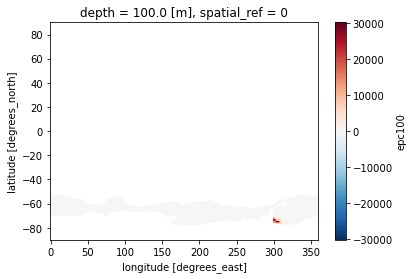

In [33]:
inc_area[variable].plot()

In [34]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [35]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth        float64 ...
    spatial_ref  int64 0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 ...
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

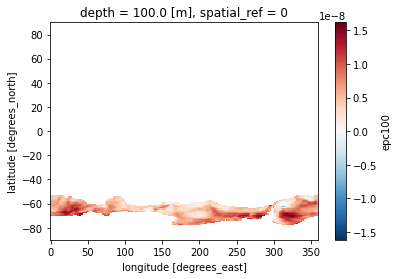

In [36]:
ab_inc_area[variable].plot()

In [37]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [38]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 189.42755126953125% 6.32454622007117e-09
 Max inc = 30230.994140625% 1.6170714545182818e-08
 Max dec = -30.01905059814453% -7.479121322262472e-09



In [39]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

##### Decreasing

In [40]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth        float64 ...
    spatial_ref  int64 0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 ...
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

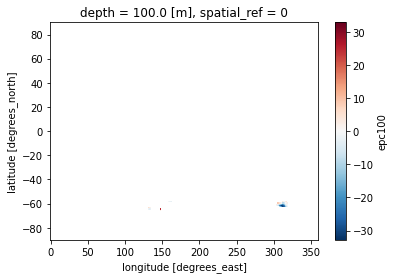

In [41]:
dec_area[variable].plot()

In [42]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [43]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (bnds: 2, lat: 180, lon: 360)
Coordinates:
    depth        float64 ...
    spatial_ref  int64 0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds   (bnds) float64 ...
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

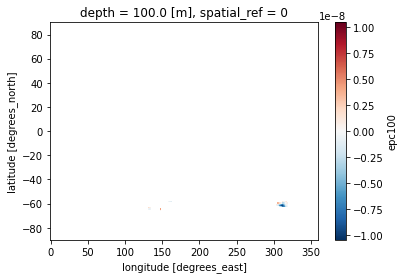

In [44]:
ab_dec_area[variable].plot()

In [45]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [46]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -6.05144739151001% -1.7142844921380629e-09
 Max inc = 24.55659294128418% 4.590379631963515e-09
 Max dec = -32.81169128417969% -1.0452428256257917e-08



In [47]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {} {}%\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [48]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [49]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

5.3066312e-08 5.235929e-12


In [50]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

6.372402e-08 7.098874e-10


In [51]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

6.372402e-08 5.235929e-12


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

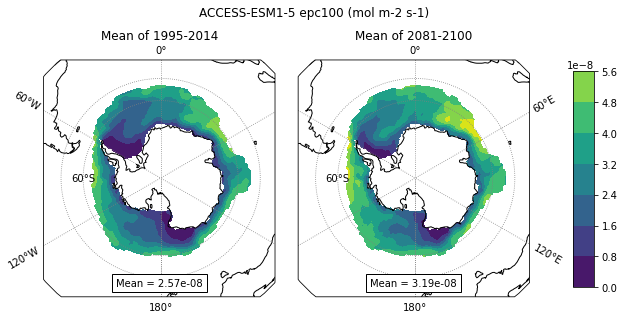

In [52]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2e}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2e}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [53]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, bnds: 2)
Coordinates:
    depth       float64 ...
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    epc100      (lat, lon) float32 ...

In [54]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

97.46229858398439 -27.182963371276855
30230.994 -32.81169


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

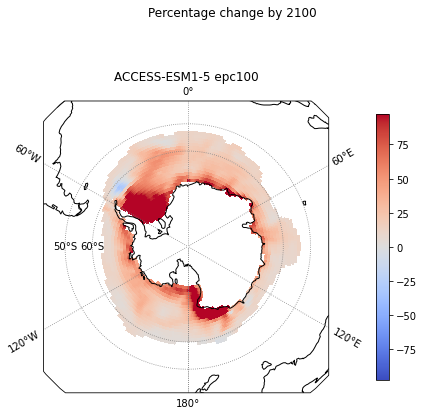

In [55]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Zonal Mean Summary 

### Increasing

In [56]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

In [57]:
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))
new_mean = np.nanmean(new[variable].values)
new_max = np.nanmax(new[variable].values)
new_min = np.nanmin(new[variable].values)
print(new_mean)     

3.192194e-08


In [71]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_inc = new.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [72]:
new_inc_mean = np.nanmean(new_inc[variable].values)
new_inc_max = np.nanmax(new_inc[variable].values)
new_inc_min = np.nanmin(new_inc[variable].values)

print(new_inc_mean, new_inc_max, new_inc_min)

5.0339352e-08 1.9207684e-07 0.0


In [73]:
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
historical_mean = np.nanmean(historical[variable].values)
historical_max = np.nanmax(historical[variable].values)
historical_min = np.nanmin(historical[variable].values)
print(historical_mean)     

4.7554288e-08


In [74]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_inc = historical.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [75]:
historical_inc_mean = np.nanmean(historical_inc[variable].values)
historical_inc_max = np.nanmax(historical_inc[variable].values)
historical_inc_min = np.nanmin(historical_inc[variable].values)

print(historical_inc_mean, historical_inc_max, historical_inc_min)

4.4624727e-08 1.9022869e-07 0.0


### Decreasing

In [76]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_dec = new.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [77]:
new_dec_mean = np.nanmean(new_dec[variable].values)
new_dec_max = np.nanmax(new_dec[variable].values)
new_dec_min = np.nanmin(new_dec[variable].values)

print(new_dec_mean, new_dec_max, new_dec_min)

4.8772446e-08 1.9207684e-07 2.599338e-08


In [78]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_dec = historical.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [79]:
historical_dec_mean = np.nanmean(historical_dec[variable].values)
historical_dec_max = np.nanmax(historical_dec[variable].values)
historical_dec_min = np.nanmin(historical_dec[variable].values)

print(historical_dec_mean, historical_dec_max, historical_dec_min)

5.2111027e-08 1.9022869e-07 2.6142713e-08


In [80]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nOverall:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_mean, new_max, new_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_mean, historical_max, historical_min))

summary.write("\n\n\nIncreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_inc_mean, new_inc_max, new_inc_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_inc_mean, historical_inc_max, historical_inc_min))

summary.write("\n\n\nDecreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_dec_mean, new_dec_max, new_dec_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_dec_mean, historical_dec_max, historical_dec_min))
summary.close()

## Mean regression 

### Total


In [58]:
# Change in annual mean value 
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
nc = nc.drop_vars("spatial_ref")
nc

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 180, lon: 360, time: 1032)
Coordinates:
    depth       float64 ...
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time        (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:0...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    epc100      (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 11:10:30 2022: cdo remapdis,r360x180 -...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f4c1c739-47c4-497e-8f79-7e42b9e186b3
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [59]:
spatial_mean = nc.groupby("time").mean(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:     (time: 1032, bnds: 2)
Coordinates:
    depth       float64 100.0
  * time        (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:0...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (time, bnds) float64 95.0 105.0 95.0 105.0 ... 105.0 95.0 105.0
    epc100      (time) float32 8.976e-08 8.166e-08 ... 1.492e-08 7.629e-08

In [60]:
year_mean = spatial_mean.groupby("time.year").mean("time")
year_mean

<xarray.Dataset>
Dimensions:     (year: 86, bnds: 2)
Coordinates:
    depth       float64 100.0
  * year        (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (year, bnds) float64 95.0 105.0 95.0 105.0 ... 105.0 95.0 105.0
    epc100      (year) float32 2.646e-08 2.615e-08 ... 3.181e-08 3.1e-08

In [61]:
var_mean = year_mean[variable].values

In [62]:
time = year_mean['year'].values
time

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [63]:
yearly_summer = []
yearly_winter = []

In [64]:
for i in time:
    year = spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    yearly_summer.append(summer)
    yearly_winter.append(winter)
    

In [65]:
data = {'Year': time,
        'Annual': var_mean,
        'Summer': yearly_summer,
        'Winter': yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,2.645978e-08,7.376076e-08,7.804582e-10,ACCESS-ESM1-5
1,2016,2.615075e-08,7.280450e-08,7.314332e-10,ACCESS-ESM1-5
2,2017,2.352554e-08,6.483753e-08,6.706267e-10,ACCESS-ESM1-5
3,2018,2.546953e-08,7.025123e-08,7.025097e-10,ACCESS-ESM1-5
4,2019,2.341411e-08,6.520531e-08,7.242160e-10,ACCESS-ESM1-5
...,...,...,...,...,...
81,2096,3.391489e-08,9.687537e-08,6.687990e-10,ACCESS-ESM1-5
82,2097,3.265628e-08,9.322735e-08,7.257636e-10,ACCESS-ESM1-5
83,2098,3.306615e-08,9.261745e-08,6.770727e-10,ACCESS-ESM1-5
84,2099,3.181440e-08,9.235406e-08,6.471124e-10,ACCESS-ESM1-5


In [66]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)

#### Plotting


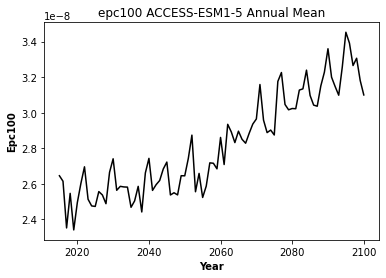

In [67]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Annual Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_annual_mean.png".format(variable, model, experiment))

plt.show()

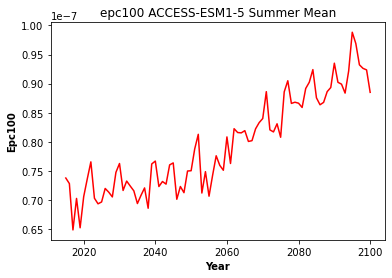

In [68]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Summer Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_summer_mean.png".format(variable, model, experiment))

plt.show()

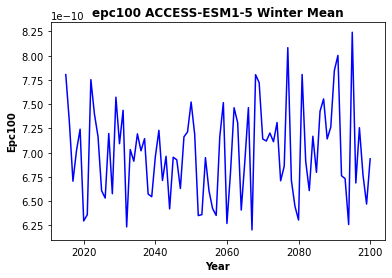

In [69]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
ax.plot(time, yearly_winter, 'b')

plt.title("{} {} Winter Mean".format(variable, model),fontweight="bold")

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_winter_mean.png".format(variable, model, experiment))

plt.show()

In [93]:
annual_inflection = 2034.4

annual_point = np.where(time == int(annual_inflection))[0].tolist()
annual_label = int(annual_inflection)
annual_position = (annual_label, var_mean[annual_point][0])


summer_inflection = 2052.9

summer_point = np.where(time == int(summer_inflection))[0].tolist()
summer_label = int(summer_inflection)
summer_position = (summer_label, yearly_summer[summer_point[0]])


# winter_inflection = 2052.9

# winter_point = np.where(time == int(winter_inflection))[0].tolist()
# winter_label = int(winter_inflection)
# winter_position = (winter_label, yearly_winter[winter_point[0]])

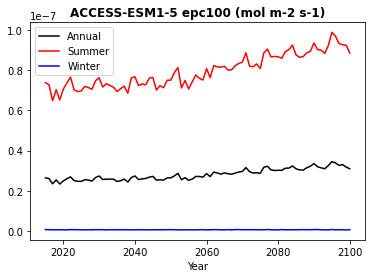

In [70]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, '-k', label = "Annual")
ax.plot(time, yearly_summer, '-r', label = "Summer")
ax.plot(time, yearly_winter, '-b', label = "Winter")

# plt.annotate(annual_label, annual_position, textcoords="offset points", xytext=(0,10), ha='center') 
# plt.annotate(summer_label, summer_position, textcoords="offset points",xytext=(0,12), ha='center') 
# #plt.annotate(winter_label, winter_position, textcoords="offset points",xytext=(0,12), ha='center') 

plt.title("{} {} ({})".format(model, variable, unit), fontweight="bold")

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
#ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

#plt.ylabel("Epc100")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment))

plt.show()

### Zonal

##### Increasing zone

In [95]:
inc = xarray.open_dataset("Data/{}_{}_{}_inc.nc".format(variable, model, experiment))
inc = inc.drop_vars("spatial_ref")
inc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [96]:
inc_spatial_mean = inc.groupby("time").mean(["lat", "lon"])
inc_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 1.301e-07 1.282e-07 ... 4.926e-08 9.728e-08

In [97]:
inc_year_mean = inc_spatial_mean.groupby("time.year").mean("time")
inc_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 4.286e-08 4.442e-08 4.647e-08 ... 5.02e-08 5.163e-08

In [98]:
inc_mean = inc_year_mean[variable].values

In [99]:
time = inc_year_mean['year'].values

In [100]:
inc_yearly_summer = []
inc_yearly_winter = []

In [101]:
for i in time:
    year = inc_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    inc_yearly_summer.append(summer)
    inc_yearly_winter.append(winter)
    

In [102]:
data = {'Year': time,
        'Annual': inc_mean,
        'Summer': inc_yearly_summer,
        'Winter': inc_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,4.285769e-08,1.047445e-07,7.563147e-09,IPSL-CM6A-LR
1,2016,4.442164e-08,1.091526e-07,7.406173e-09,IPSL-CM6A-LR
2,2017,4.647353e-08,1.138622e-07,7.749789e-09,IPSL-CM6A-LR
3,2018,4.848721e-08,1.200793e-07,7.641230e-09,IPSL-CM6A-LR
4,2019,4.619483e-08,1.146644e-07,7.507531e-09,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,5.111865e-08,1.229735e-07,7.829864e-09,IPSL-CM6A-LR
82,2097,5.113717e-08,1.239879e-07,7.685638e-09,IPSL-CM6A-LR
83,2098,5.085575e-08,1.225390e-07,8.011181e-09,IPSL-CM6A-LR
84,2099,5.019895e-08,1.195268e-07,7.789430e-09,IPSL-CM6A-LR


In [103]:
df.to_csv("csv/{}_{}_inc.csv".format(model, variable), index = False, header=True)

##### Decreasing zone

In [104]:
dec = xarray.open_dataset("Data/{}_{}_{}_dec.nc".format(variable, model, experiment))
dec = dec.drop_vars("spatial_ref")
dec

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [105]:
dec_spatial_mean = dec.groupby("time").mean(["lat", "lon"])
dec_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 1.506e-07 1.297e-07 ... 6.635e-08 1.036e-07

In [106]:
dec_year_mean = dec_spatial_mean.groupby("time.year").mean("time")
dec_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 5.168e-08 5.23e-08 5.42e-08 ... 4.712e-08 4.913e-08

In [107]:
dec_mean = dec_year_mean[variable].values

In [108]:
dec_yearly_summer = []
dec_yearly_winter = []

In [109]:
for i in time:
    year = dec_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    dec_yearly_summer.append(summer)
    dec_yearly_winter.append(winter)
    

In [110]:
time = dec_year_mean['year'].values

In [111]:
data = {'Year': time,
        'Annual': dec_mean,
        'Summer': dec_yearly_summer,
        'Winter': dec_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,5.167785e-08,1.221166e-07,9.500848e-09,IPSL-CM6A-LR
1,2016,5.229992e-08,1.270893e-07,9.202374e-09,IPSL-CM6A-LR
2,2017,5.419767e-08,1.273510e-07,9.249270e-09,IPSL-CM6A-LR
3,2018,5.192076e-08,1.208217e-07,9.259648e-09,IPSL-CM6A-LR
4,2019,5.262438e-08,1.242178e-07,9.421306e-09,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,4.826642e-08,1.035716e-07,9.113737e-09,IPSL-CM6A-LR
82,2097,4.767493e-08,9.898366e-08,9.141426e-09,IPSL-CM6A-LR
83,2098,4.842247e-08,9.999770e-08,9.492612e-09,IPSL-CM6A-LR
84,2099,4.712034e-08,9.743881e-08,9.182642e-09,IPSL-CM6A-LR


In [112]:
df.to_csv("csv/{}_{}_dec.csv".format(model, variable), index = False, header=True)

##### Plotting

In [212]:
inc_inflection = 2034.4

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_mean[inc_point][0])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_mean[dec_point][0])

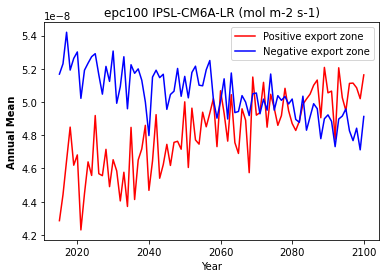

In [113]:
fig, ax = plt.subplots()


ax.plot(time, inc_mean, '-r',  label = "Positive export zone")
ax.plot(time, dec_mean, '-b', label = "Negative export zone")


#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_annual_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
inc_inflection = 2052.9

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_yearly_summer[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_summer[dec_point[0]])

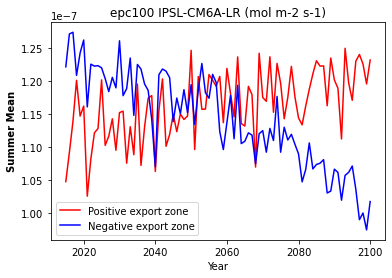

In [114]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_summer, '-r', label = "Positive export zone")
ax.plot(time, dec_yearly_summer, '-b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_summer_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
# inc_inflection = 2052.9

# inc_point = np.where(time == int(inc_inflection))[0].tolist()
# inc_label = int(inc_inflection)
# inc_position = (inc_label, inc_yearly_winter[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_winter[dec_point[0]])

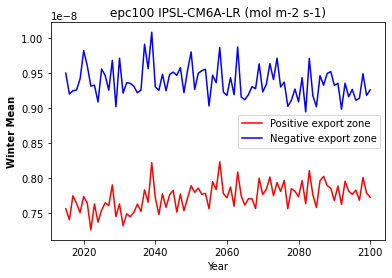

In [116]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_winter, 'r', label = "Positive export zone")
ax.plot(time, dec_yearly_winter, 'b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_winter_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()